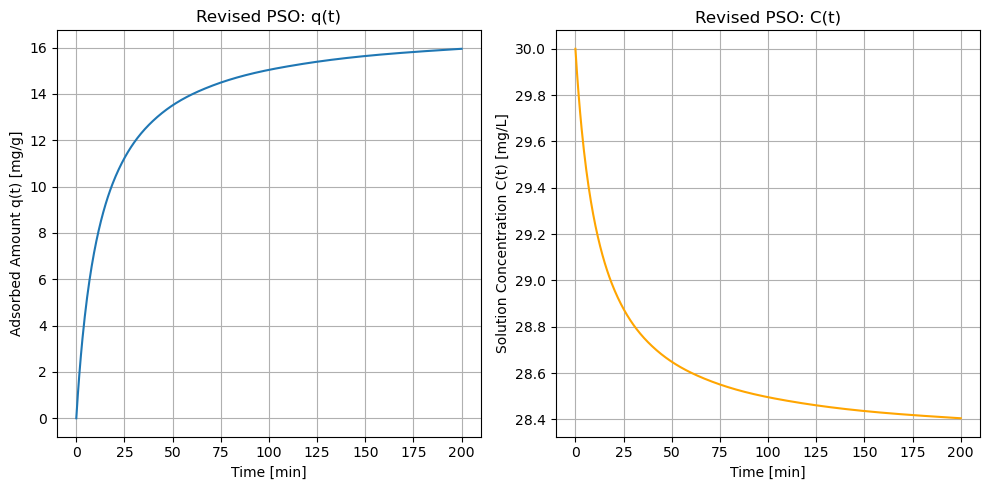

**Langmuir Simulation Summary**

,quantity,value
0,q_final_mg_per_g,15.948607
1,C_final_mg_per_L,28.405139


In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Langmuir isotherm parameters
q_max = 20.0     # mg/g
K_L = 0.2        # L/mg

# Reference experiment values
q_e_star = 15.0  # mg/g
C0_star = 50.0   # mg/L
k2 = 0.01        # g/mg/min

# Revised rate constant
k_prime = (k2 * q_e_star**2) / C0_star

# Experimental initial conditions
C0 = 30.0       # mg/L
m = 0.1         # g of adsorbent in solution
V = 1.0         # L volume
q0 = 0.0        # mg/g initially adsorbed

# Mass balance: q_t and C_t are linked via:
# C_t = C0 - (m/V) * q_t

def langmuir_qe(C):
    return (q_max * K_L * C) / (1 + K_L * C)

def rqso_ode(t, q_t):
    C_t = C0 - (m / V) * q_t[0]  # mg/L
    q_e = langmuir_qe(C_t)
    dqdt = k_prime * C_t * (1 - q_t[0]/q_e)**2
    return [dqdt]

# Time span for simulation (minutes)
t_span = (0, 200)
t_eval = np.linspace(*t_span, 500)

# Solve ODE
sol = solve_ivp(rqso_ode, t_span, [q0], t_eval=t_eval)

# Extract results
t = sol.t
q_t = sol.y[0]
C_t = C0 - (m/V) * q_t

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, q_t, label='q(t) [mg/g]')
plt.xlabel('Time [min]')
plt.ylabel('Adsorbed Amount q(t) [mg/g]')
plt.title('Revised PSO: q(t)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, C_t, label='C(t) [mg/L]', color='orange')
plt.xlabel('Time [min]')
plt.ylabel('Solution Concentration C(t) [mg/L]')
plt.title('Revised PSO: C(t)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Summarize final values and display with a portable fallback
import pandas as pd
summary = pd.DataFrame({
    'quantity': ['q_final_mg_per_g', 'C_final_mg_per_L'],
    'value': [q_t[-1], C_t[-1]]
})
# NOTE: Use internal display helper when available; otherwise fall back to IPython.display
try:
    import caas_jupyter_tools
    caas_jupyter_tools.display_dataframe_to_user('Langmuir Simulation Summary', summary)
except Exception:
    from IPython.display import display, Markdown
    display(Markdown('**Langmuir Simulation Summary**'))
    display(summary)

